---
title: "Decision Trees"
format:
    html:
        page-layout: full
        code-fold: show
        code-copy: true
        code-tools: true
        code-overflow: wrap
---

## Introduction ##

Decision Trees are an important branch in machine learning that are used for classification and regression problems. The process of a decision tree is carried out by partitioning datasets repeatedly, splitting the data into different regions based on specified criteria. Decison trees contain a root node, which is the starting point (whole dataset), decision nodes and leaf nodes which are connected by edges (or branches) on splitting criteria. Decision trees take a feature set and partition data based on these features to reach predictions for the target variable. Random forests and Boosting are techniques that are used to enhance the performance of decision trees, which we will discuss later. 

## Method ##

In [118]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
import os
os.chdir('/Users/samanthamoon/Desktop/DSAN 5000/dsan-5000-project-samjmoon/dsan-website/5000-website/data-cleaning')
movie_df = pd.read_csv('popularity_data_analysis.csv')

In [119]:
movie_df.head()

,avg_rating,budget,popularity,revenue,runtime,vote_average,vote_count
0,3.920930,30000000,High,373554033.0,81.0,7.7,5415.0
1,3.431818,65000000,Medium,262797249.0,104.0,6.9,2413.0
2,3.259615,0,Medium,0.0,101.0,6.5,92.0
3,2.357143,16000000,Low,81452156.0,127.0,6.1,34.0
4,3.071429,0,Low,76578911.0,106.0,5.7,173.0


In [120]:
drop_cols_0 = ['budget', 'revenue']
movie_df = movie_df[(movie_df[drop_cols_0] != 0).all(axis=1)]
movie_df['popularity'] = movie_df['popularity'].astype(str)

#assigning popularity column Low: 0, Medium: 1, High: 2
movie_df['popularity'] = movie_df['popularity'].map({'Low': 0, 'Medium': 1, 'High': 2})
movie_df.head()

,avg_rating,budget,popularity,revenue,runtime,vote_average,vote_count
0,3.920930,30000000,2,373554033.0,81.0,7.7,5415.0
1,3.431818,65000000,1,262797249.0,104.0,6.9,2413.0
3,2.357143,16000000,0,81452156.0,127.0,6.1,34.0
5,3.946078,60000000,1,187436818.0,170.0,7.7,1886.0
8,3.125000,35000000,0,64350171.0,106.0,5.5,174.0


(7, 7)


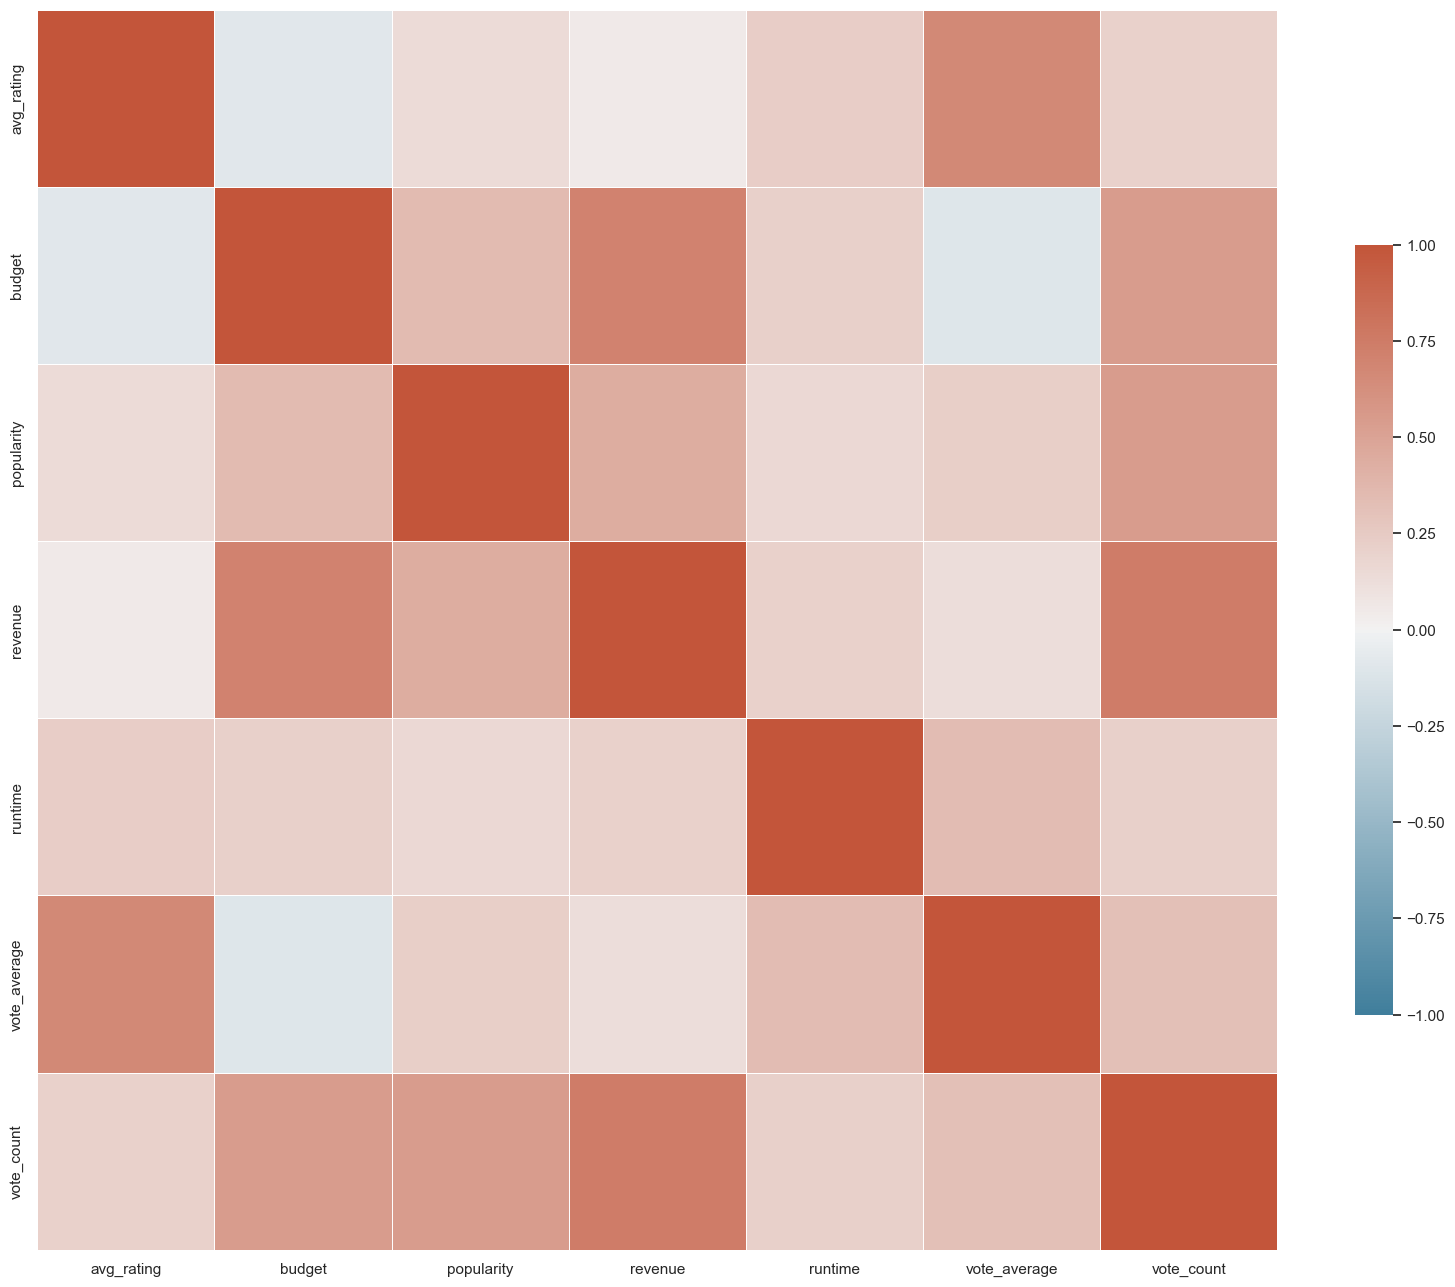

In [121]:
#correlation of feature matrix
corr = movie_df.corr()
print(corr.shape)
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [122]:
X = movie_df.drop(columns=['popularity'])
Y = movie_df['popularity'] 

In [123]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [124]:
#traning decision tree model
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

In [125]:
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

In [126]:
from sklearn.metrics import confusion_matrix, classification_report

def confusion_plot(y_data, y_pred):

    cm = confusion_matrix(y_data, y_pred)

    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    neg_recall = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    neg_precision = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    pos_recall = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    pos_precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])

    print("ACCURACY:", accuracy)
    print("NEGATIVE RECALL (Y=0):", neg_recall)
    print("NEGATIVE PRECISION (Y=0):", neg_precision)
    print("POSITIVE RECALL (Y=1):", pos_recall)
    print("POSITIVE PRECISION (Y=1):", pos_precision)
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'size': 14})
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

------TRAINING------
ACCURACY: 0.9673571876961707
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 0.9994469026548672
POSITIVE RECALL (Y=1): 0.9992163009404389
POSITIVE PRECISION (Y=1): 1.0
[[1807    0    0]
 [   1 1275    0]
 [   0    0  103]]


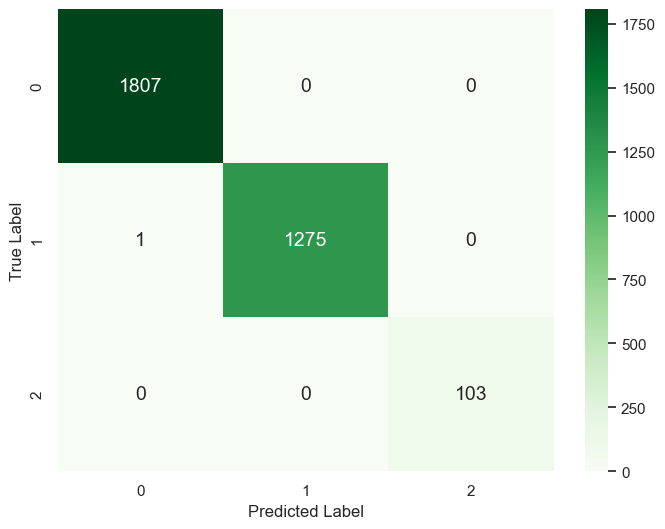

------TEST------
ACCURACY: 0.5872020075282308
NEGATIVE RECALL (Y=0): 0.6811926605504587
NEGATIVE PRECISION (Y=0): 0.668918918918919
POSITIVE RECALL (Y=1): 0.5377358490566038
POSITIVE PRECISION (Y=1): 0.5516129032258065
[[297 139   5]
 [147 171  15]
 [  3   8  12]]


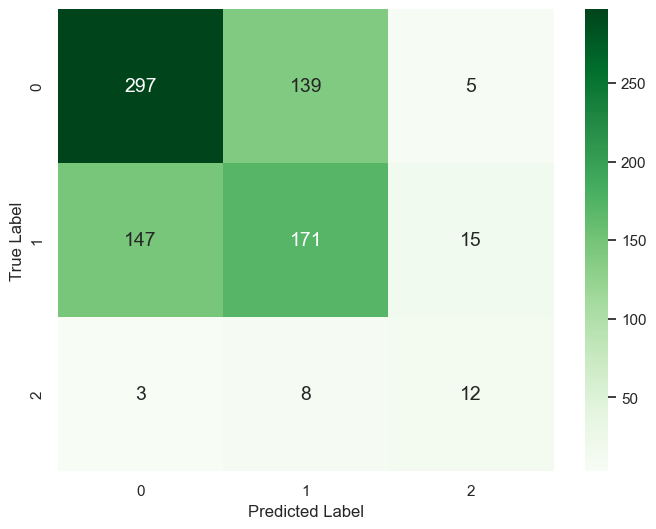

In [127]:
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

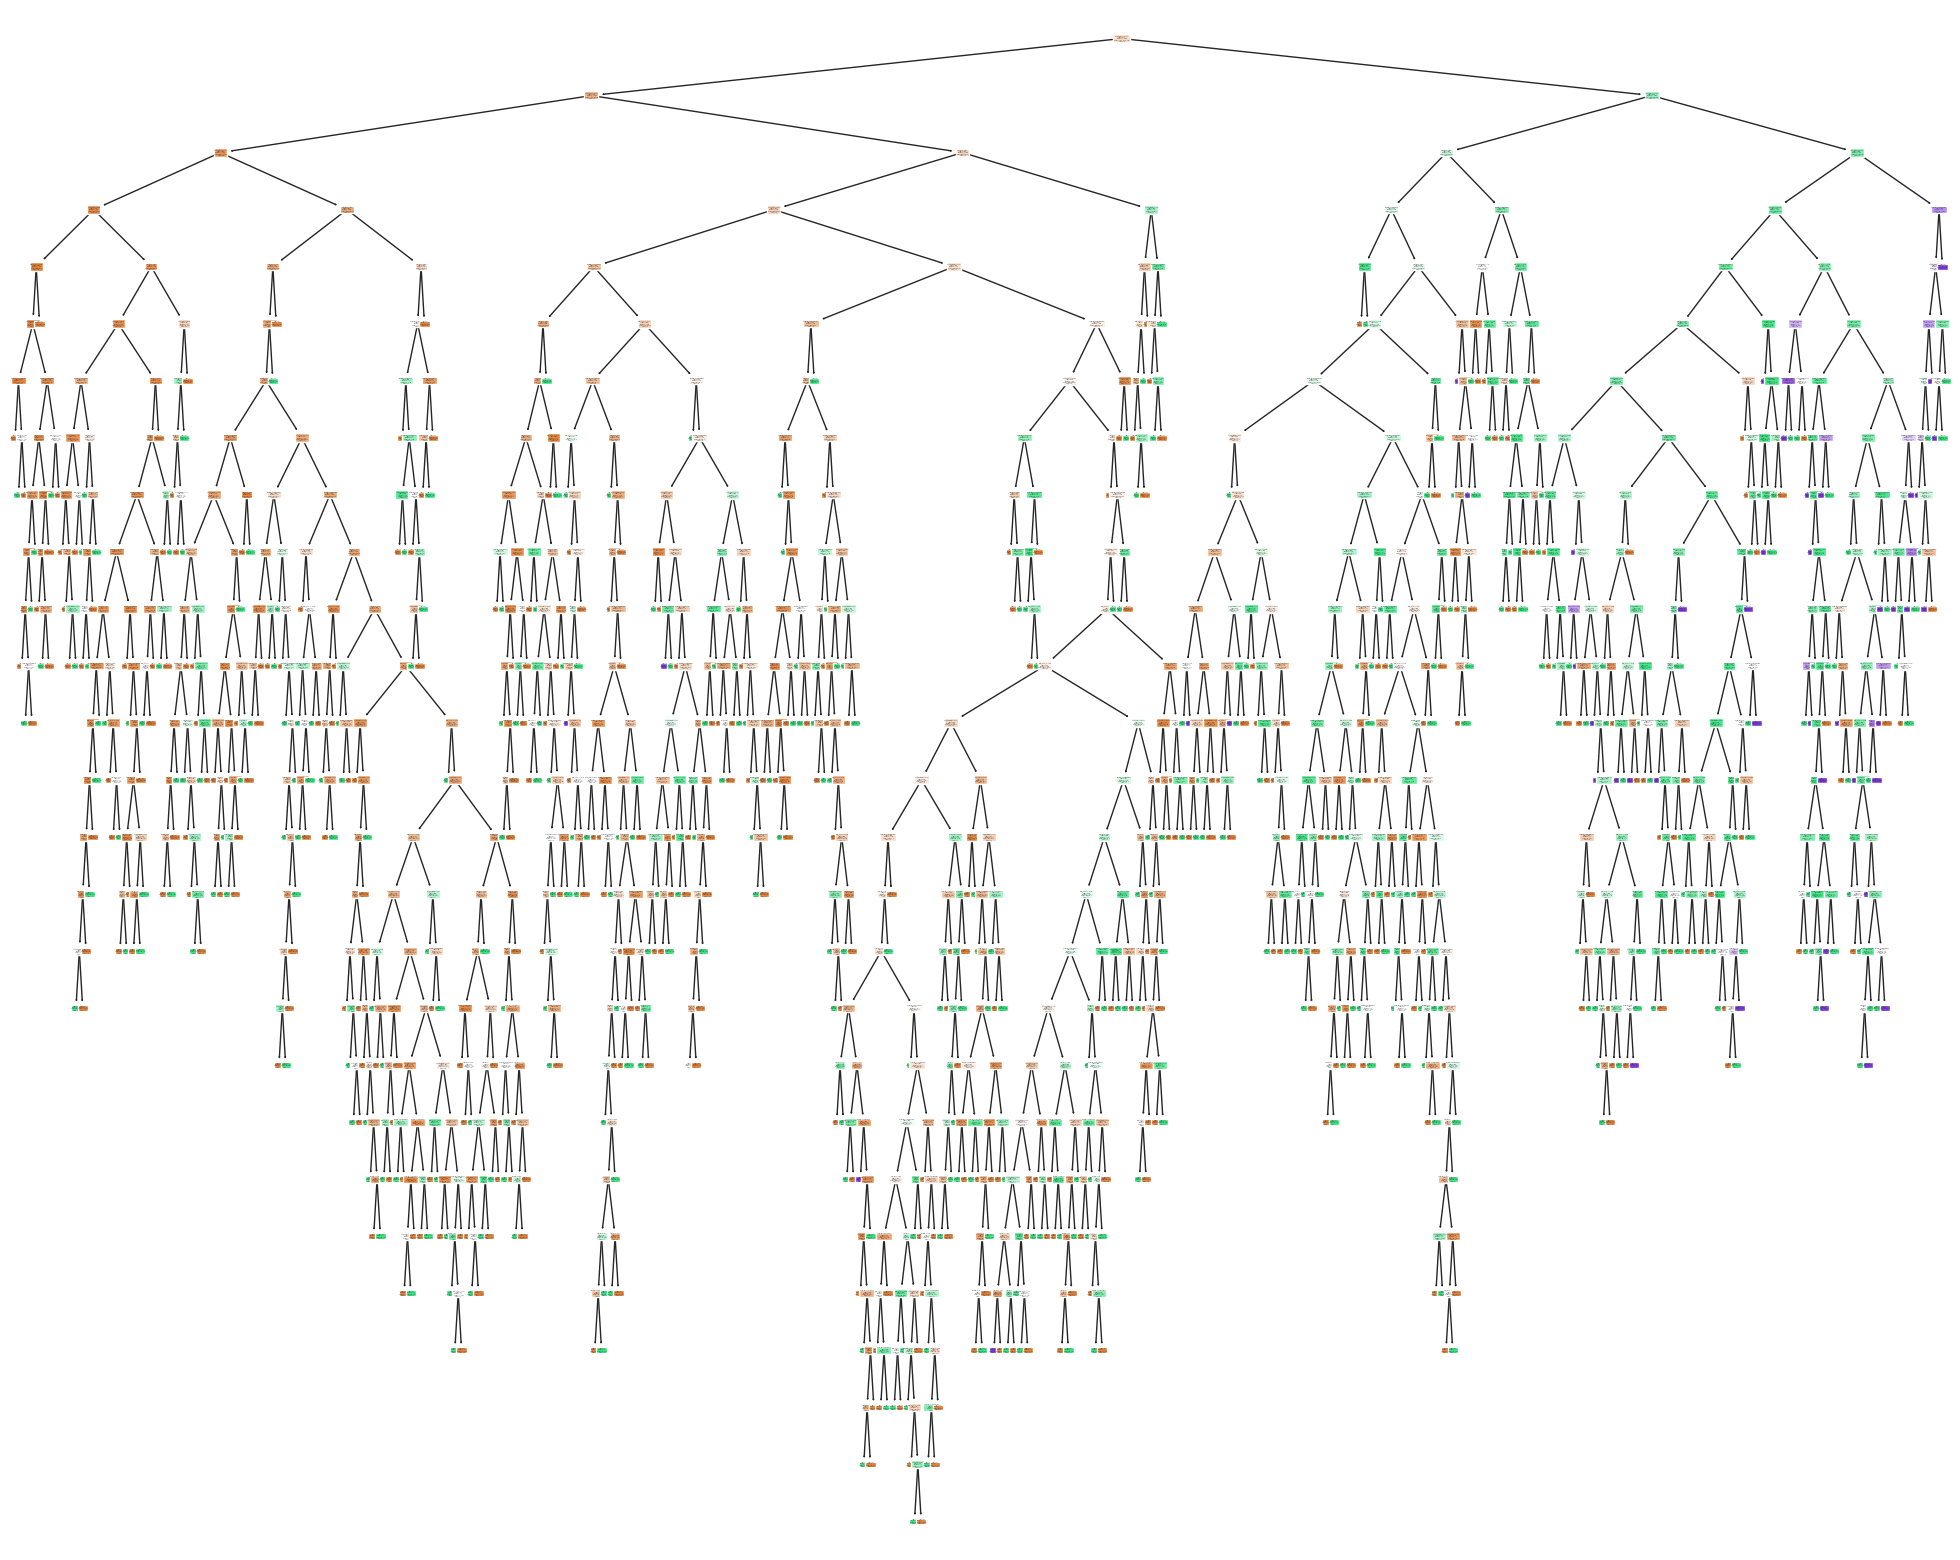

In [128]:
def plot_tree(model, X, Y):
    feature_names = X.columns.tolist()
    class_names = sorted(Y.unique().astype(str).tolist())
    fig = plt.figure(figsize=(25, 20))
    _ = tree.plot_tree(model, 
                  feature_names=feature_names,
                  class_names=class_names,
                  filled=True)
    plt.show()

plot_tree(model, x_train, y_train)

In [129]:
#I will use the "micro" strategy for the recall score as the classes have imbalanced sizes
from sklearn.tree import DecisionTreeClassifier
test_results = []
train_results = []

for num_layer in range(1, 20):
    model = DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    test_results.append([
        num_layer,
        accuracy_score(y_test, yp_test),
        recall_score(y_test, yp_test, average='micro'),
        recall_score(y_test, yp_test, average='micro'),
        recall_score(y_test, yp_test, average='micro')
    ])
    train_results.append([
        num_layer,
        accuracy_score(y_train, yp_train),
        recall_score(y_train, yp_train, average='micro'),
        recall_score(y_train, yp_train, average='micro'),
        recall_score(y_train, yp_train, average='micro')
    ])

columns = ['max_depth', 'Accuracy', 'Recall Y=0', 'Recall Y=1', 'Recall Y=2']
test_df = pd.DataFrame(test_results, columns=columns)
train_df = pd.DataFrame(train_results, columns=columns)

print(test_df.head())
print(train_df.head())


   max_depth  Accuracy  Recall Y=0  Recall Y=1  Recall Y=2
0          1  0.708908    0.708908    0.708908    0.708908
1          2  0.708908    0.708908    0.708908    0.708908
2          3  0.706399    0.706399    0.706399    0.706399
3          4  0.703890    0.703890    0.703890    0.703890
4          5  0.705144    0.705144    0.705144    0.705144
   max_depth  Accuracy  Recall Y=0  Recall Y=1  Recall Y=2
0          1  0.698054    0.698054    0.698054    0.698054
1          2  0.698054    0.698054    0.698054    0.698054
2          3  0.708098    0.708098    0.708098    0.708098
3          4  0.709353    0.709353    0.709353    0.709353
4          5  0.717514    0.717514    0.717514    0.717514


Text(0.5, 0, 'Number of Layers in Decision Tree (max_depth)')

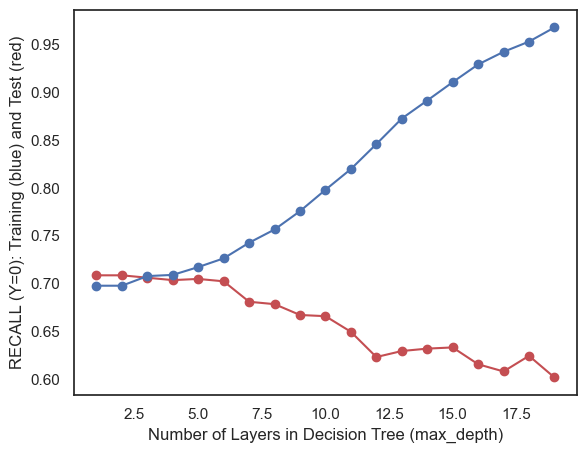

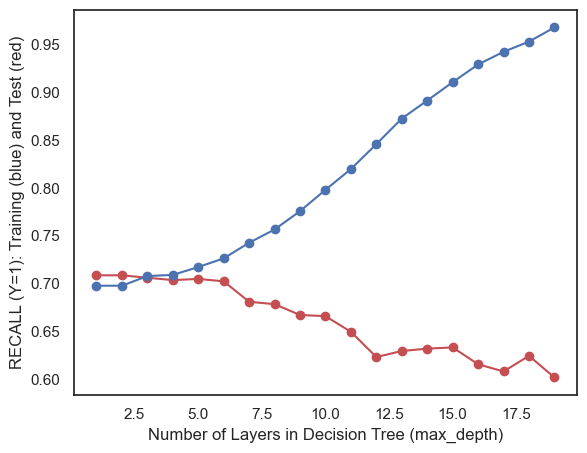

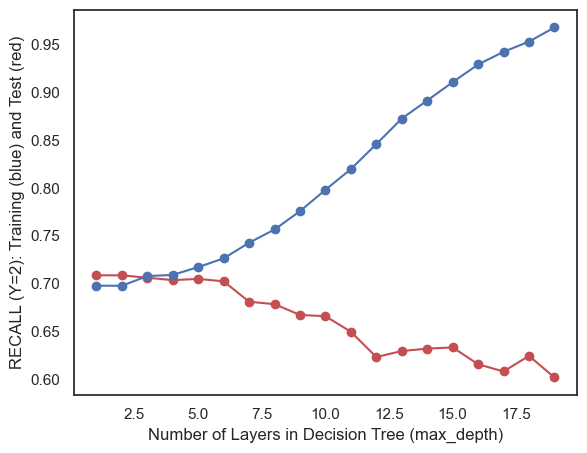

In [130]:
plt.figure(figsize=(6.5,5))
plt.plot(test_df['max_depth'], test_df['Recall Y=0'], marker='o', linestyle='-', color='r')
plt.plot(train_df['max_depth'], train_df['Recall Y=0'], marker='o', linestyle='-', color='b')
plt.ylabel('RECALL (Y=0): Training (blue) and Test (red)')
plt.xlabel('Number of Layers in Decision Tree (max_depth)')

plt.figure(figsize=(6.5,5))
plt.plot(test_df['max_depth'], test_df['Recall Y=1'], marker='o', linestyle='-', color='r')
plt.plot(train_df['max_depth'], train_df['Recall Y=1'], marker='o', linestyle='-', color='b')
plt.ylabel('RECALL (Y=1): Training (blue) and Test (red)')
plt.xlabel('Number of Layers in Decision Tree (max_depth)')

plt.figure(figsize=(6.5,5))
plt.plot(test_df['max_depth'], test_df['Recall Y=2'], marker='o', linestyle='-', color='r')
plt.plot(train_df['max_depth'], train_df['Recall Y=2'], marker='o', linestyle='-', color='b')
plt.ylabel('RECALL (Y=2): Training (blue) and Test (red)')
plt.xlabel('Number of Layers in Decision Tree (max_depth)')

In [131]:
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

------TRAINING------
ACCURACY: 0.697112366603892
NEGATIVE RECALL (Y=0): 0.8443213296398892
NEGATIVE PRECISION (Y=0): 0.7295356629966491
POSITIVE RECALL (Y=1): 0.5522979397781299
POSITIVE PRECISION (Y=1): 0.712678936605317
[[1524  281    2]
 [ 565  697   14]
 [   4   64   35]]


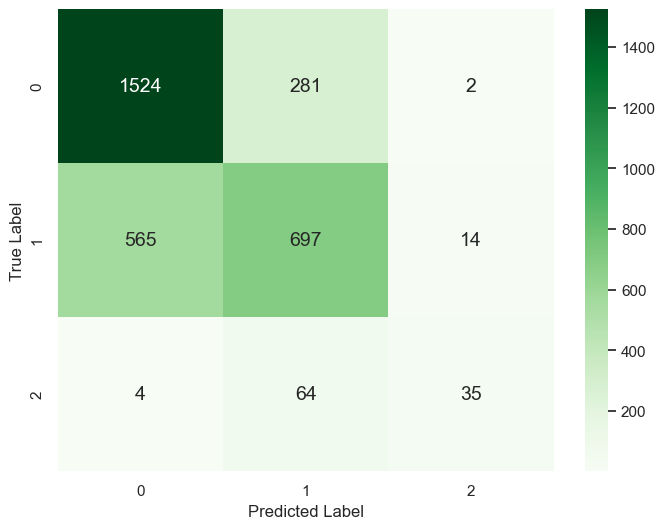

------TEST------
ACCURACY: 0.6963613550815558
NEGATIVE RECALL (Y=0): 0.8477272727272728
NEGATIVE PRECISION (Y=0): 0.7228682170542635
POSITIVE RECALL (Y=1): 0.56
POSITIVE PRECISION (Y=1): 0.7309236947791165
[[373  67   1]
 [143 182   8]
 [  1  14   8]]


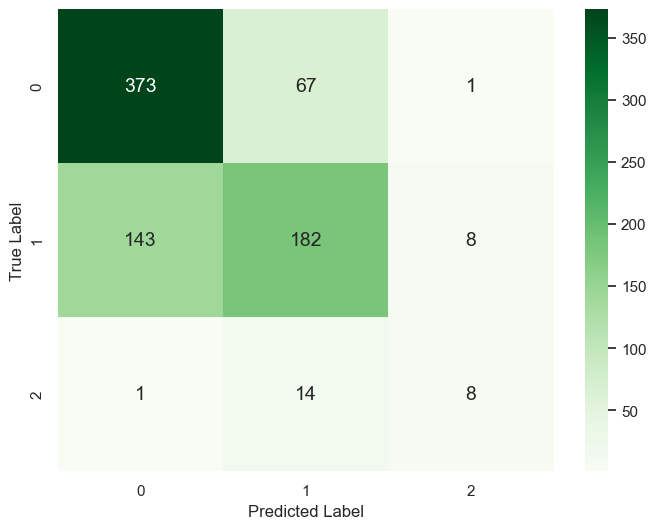

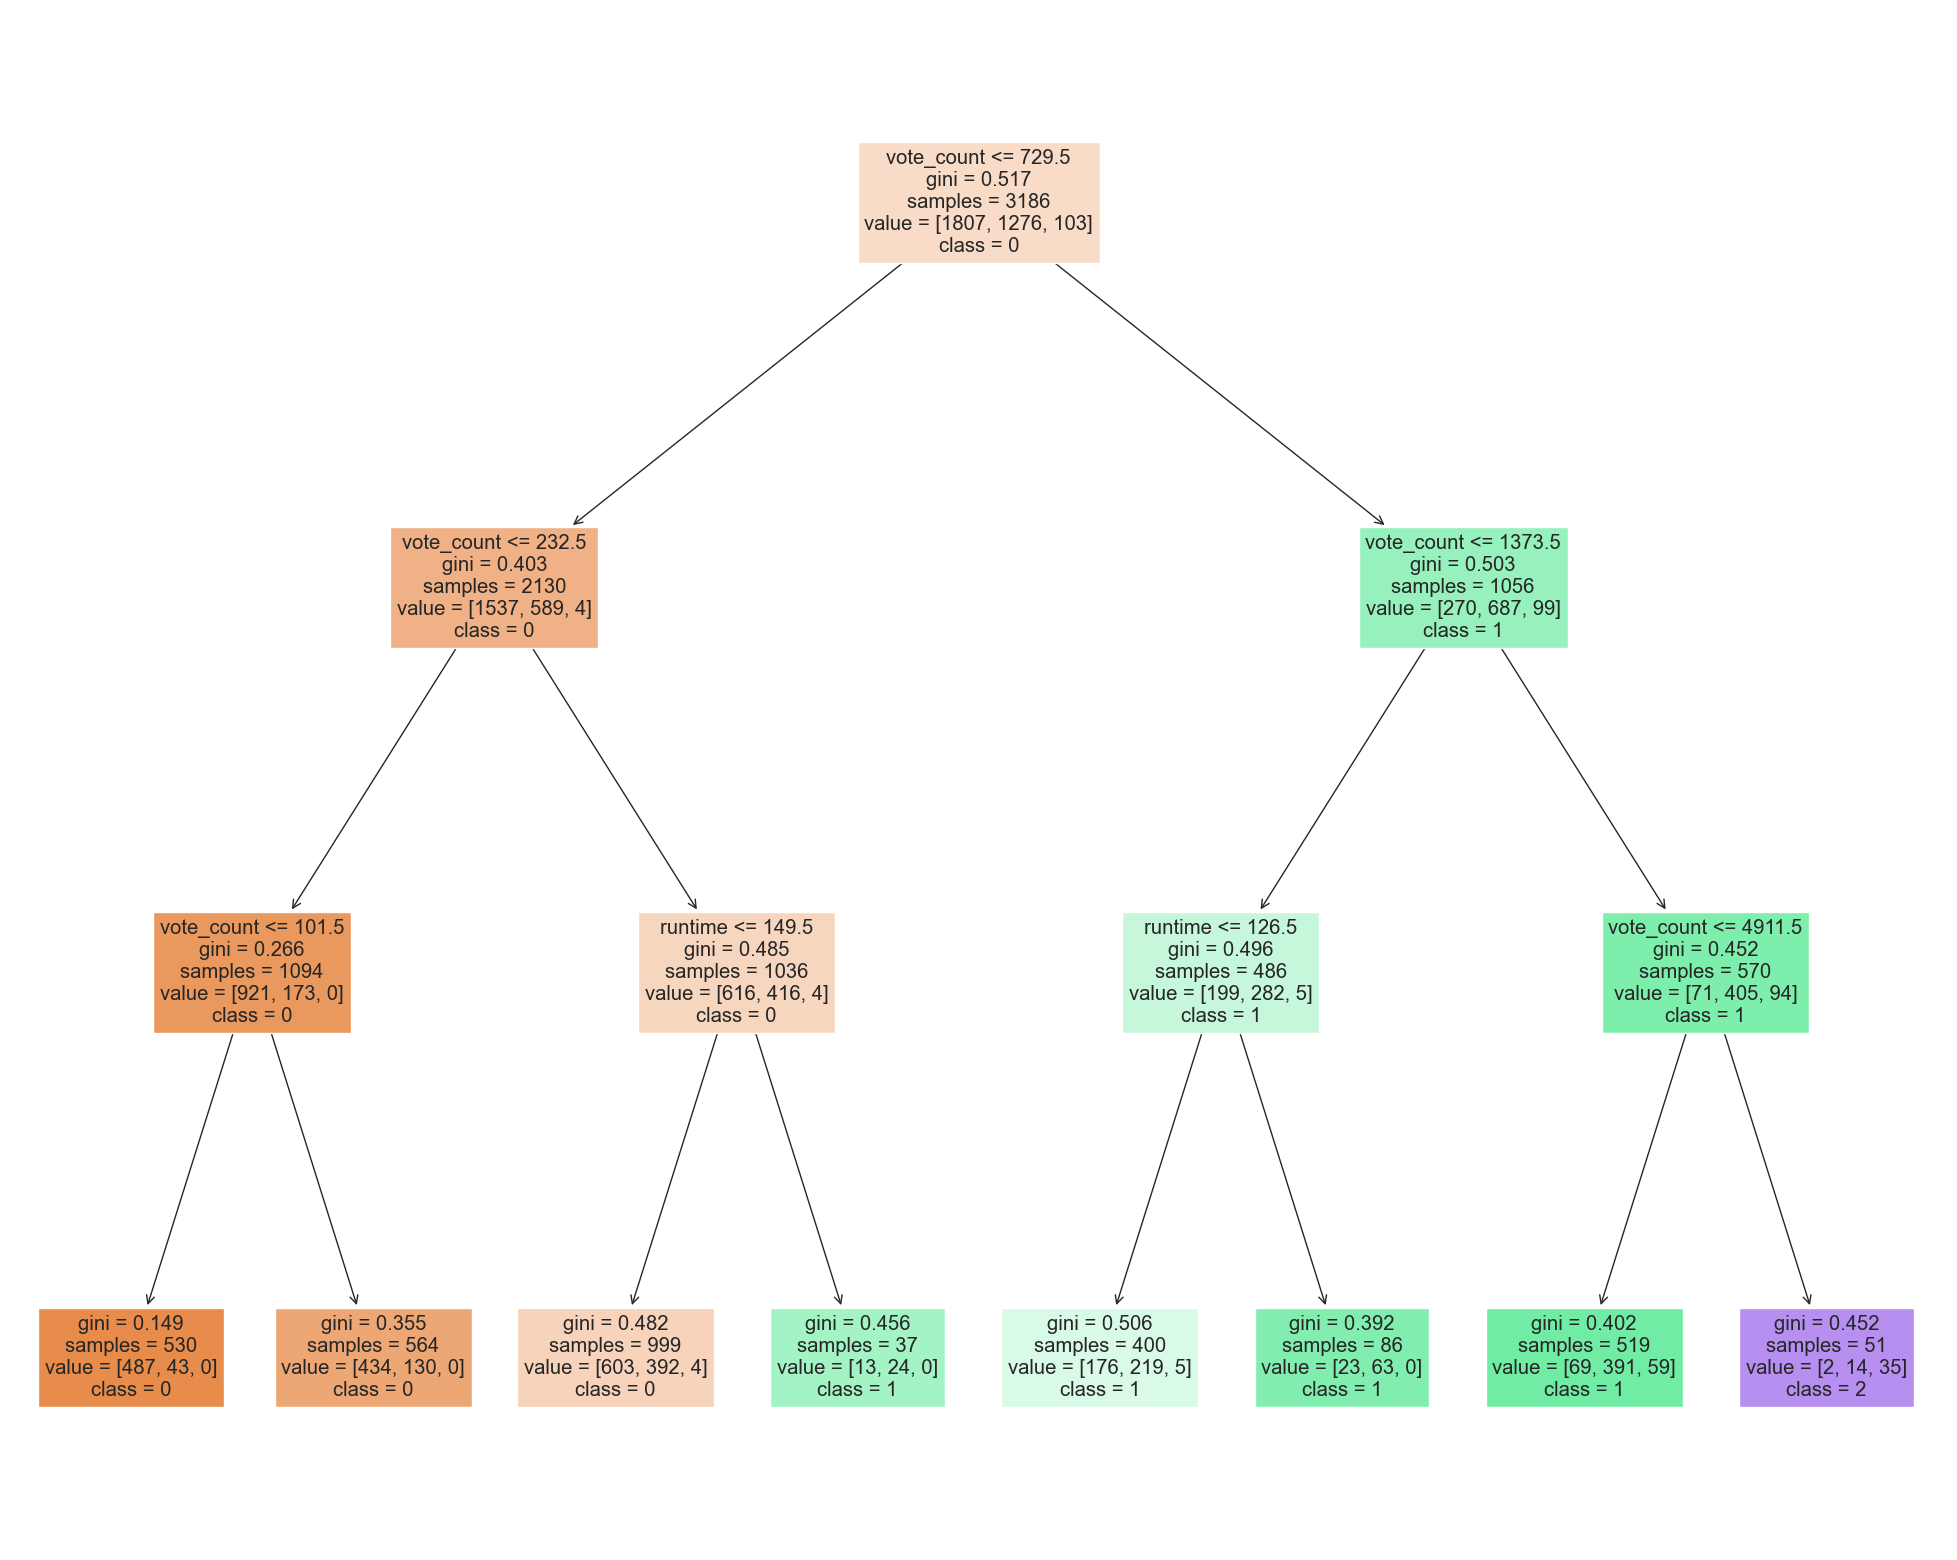

In [132]:
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

plot_tree(model, X, Y)

## Random Forests ##

------TRAINING (Random Forest)------
ACCURACY: 0.7024482109227872
NEGATIVE RECALL (Y=0): 0.8638627559490869
NEGATIVE PRECISION (Y=0): 0.7226851851851852
POSITIVE RECALL (Y=1): 0.530564263322884
POSITIVE PRECISION (Y=1): 0.733477789815818
[[1561  246    0]
 [ 599  677    0]
 [   5   91    7]]


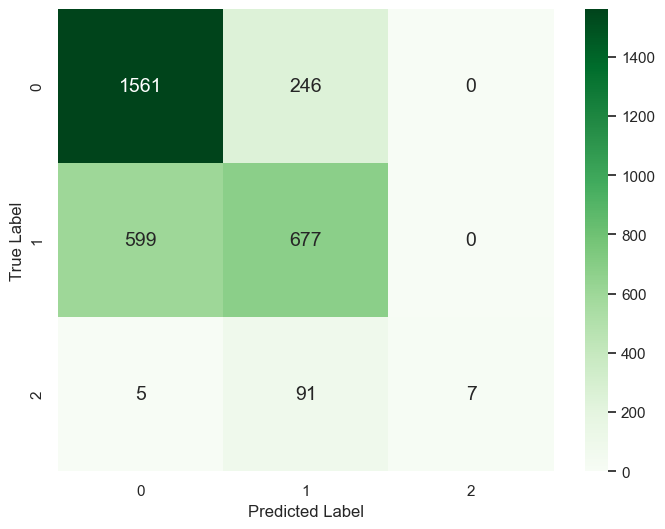

------TEST (Random Forest)------
ACCURACY: 0.6875784190715182
NEGATIVE RECALL (Y=0): 0.8412698412698413
NEGATIVE PRECISION (Y=0): 0.7053231939163498
POSITIVE RECALL (Y=1): 0.5331325301204819
POSITIVE PRECISION (Y=1): 0.7165991902834008
[[371  70   0]
 [155 177   1]
 [  1  20   2]]


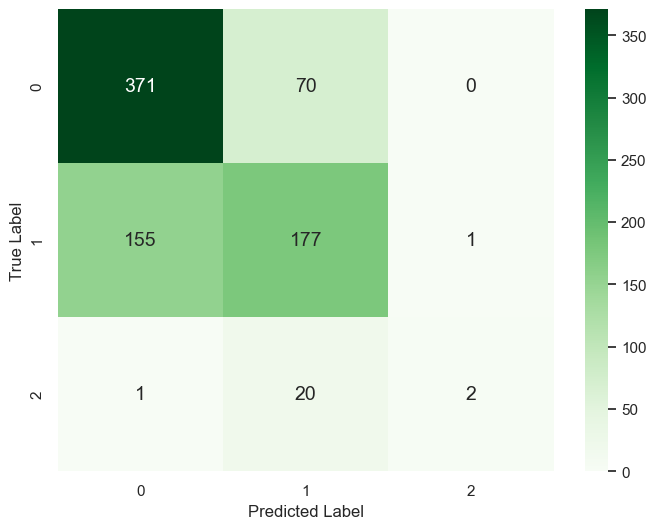

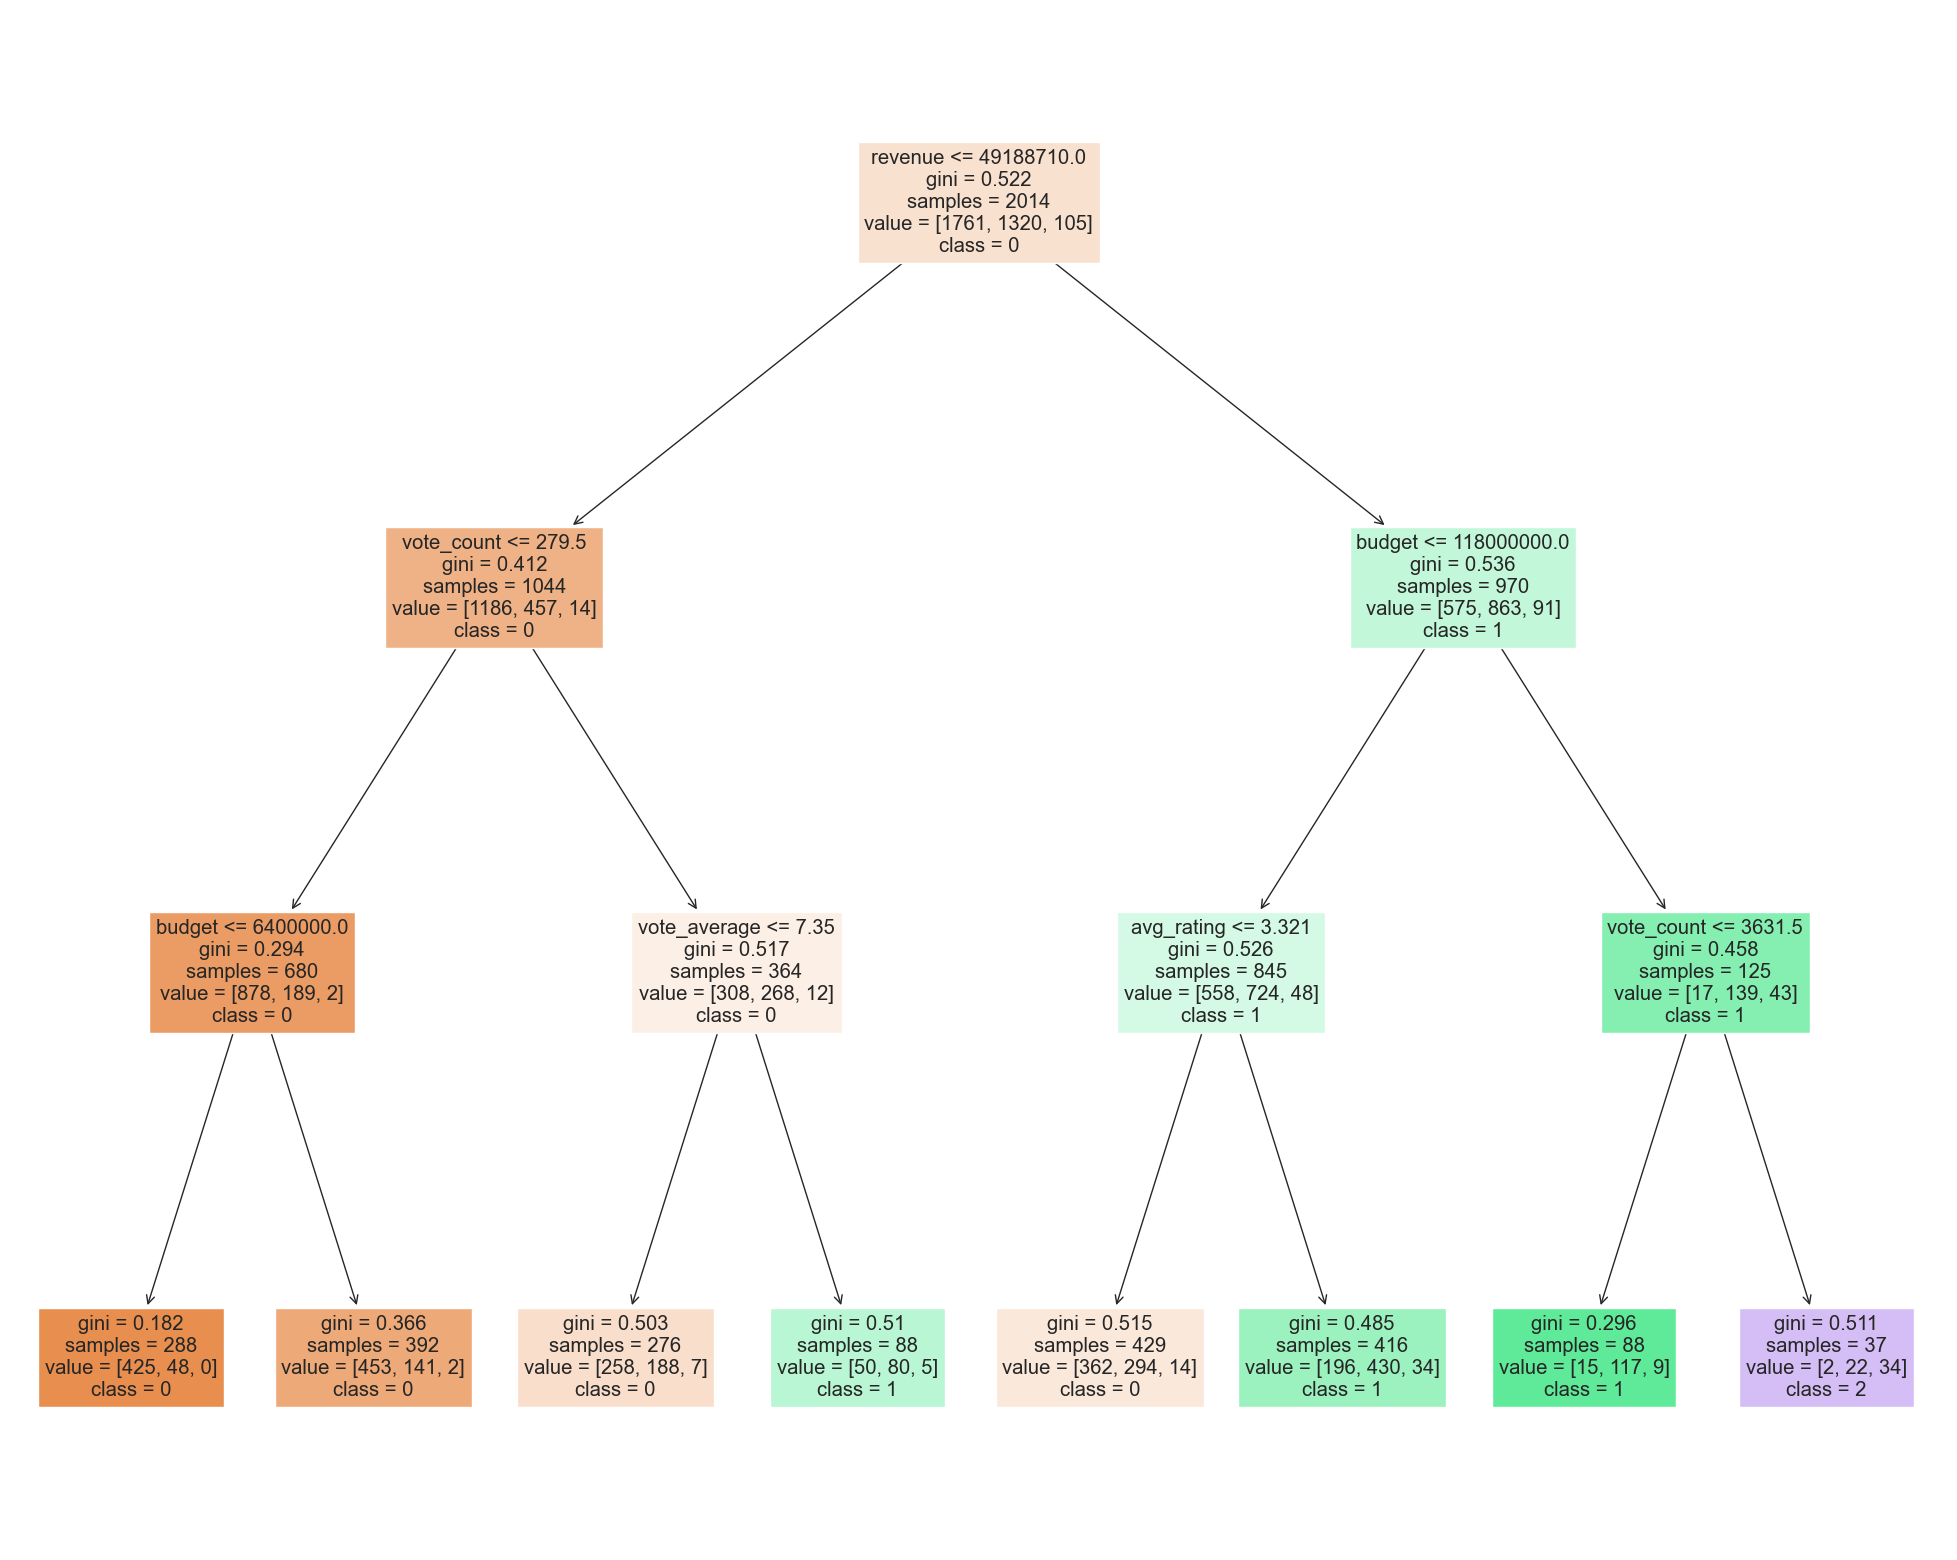

In [134]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=3)
rf_model.fit(x_train, y_train)
yp_train_rf = rf_model.predict(x_train)
yp_test_rf = rf_model.predict(x_test)
print("------TRAINING (Random Forest)------")
confusion_plot(y_train, yp_train_rf)
print("------TEST (Random Forest)------")
confusion_plot(y_test, yp_test_rf)

#visualizing one of the trees in the Random Forest
plot_tree(rf_model.estimators_[0], x_train, y_train)


## Final Results ##

In [141]:
def evaluate_accuracy(y_true, y_pred, label):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {accuracy}")

#single decision tree
print("Decision Tree - Accuracy Scores:")
evaluate_accuracy(y_train, yp_train, "Training")
evaluate_accuracy(y_test, yp_test, "Testing")

print("Decision Tree - Classification Report:")
print(classification_report(y_test, yp_test))

#random forest
print("Random Forests - Accuracy Scores:")
evaluate_accuracy(y_train, yp_train_rf, "Training")
evaluate_accuracy(y_test, yp_test_rf, "Testing")

print("Random Forest - Classification Report:")
print(classification_report(y_test, yp_test_rf))

Decision Tree - Accuracy Scores:
Training Accuracy: 0.7080979284369114
Testing Accuracy: 0.7063989962358845
Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       441
           1       0.69      0.55      0.61       333
           2       0.47      0.35      0.40        23

    accuracy                           0.71       797
   macro avg       0.63      0.58      0.60       797
weighted avg       0.70      0.71      0.70       797

Random Forests - Accuracy Scores:
Training Accuracy: 0.7046453232893911
Testing Accuracy: 0.6900878293601004
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.84      0.77       441
           1       0.66      0.53      0.59       333
           2       0.67      0.09      0.15        23

    accuracy                           0.69       797
   macro avg       0.68      0.49      0.50       79

I applied a decision tree model to my movie dataset, using the "popularity" column as the target variable. After testing various max_depth values, it was determined that the optimal max_depth is 3 from visualizing the training and testing sets recall scores against different max-depth values. I trained a random forest model to see if it would improve my decision tree model. The accuracy scores from teh single decision tree model and the random forest model perfomed similarly, with the decision tree model slightly higher. Because my dataset is not very large, a single decision tree suffices.

## Conclusion ##

We explored the movie dataset with the following machine learning techniques: decision trees and random forests. Both models performed ddecently, with the decision tree demonstrating a slightly more robust understanding during training that applied well to the testing data. The random forest model showed slightly lower accuracy but will still on par with the decision tree method.

While I was able to apply these models to my dataset, there is room for refinement which might include exploration of additional features or alternative algorithms that can enhance predictive accuracy. Applying machine learning algorithms to movie data holds many possibilities for understanding audience preferences while defining a movie's popularity. I would like to revisit the decision tree and random forest models with additional data to obtain more predictive accuracy. 